In [1]:
#NATURAL LANGUAGE PROCESSING

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("../input/restaurant-reviews/Restaurant_Reviews1.csv",delimiter='\t',quoting=3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
#Importing libraries
import re
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords


In [5]:
# Grab all the titles 
Reviews = df['Review']
# Create a list of strings, one for each title
Reviews = [reviews for reviews in Reviews]

# Collapse the list of strings into a single long string for processing
Reviews_string = ' '.join(Reviews)

In [6]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',Reviews_string)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [7]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)

sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]

In [8]:
# Training the Word2Vec model
model = Word2Vec(sentences, min_count=2)

words = model.wv.vocab

In [9]:
words

{'wow': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78a90>,
 '...': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78350>,
 'loved': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78910>,
 'place': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78e90>,
 '.': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78e10>,
 'crust': <gensim.models.keyedvectors.Vocab at 0x7fd55cb781d0>,
 'good': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78410>,
 'tasty': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78890>,
 'texture': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78750>,
 'nasty': <gensim.models.keyedvectors.Vocab at 0x7fd55cb789d0>,
 'stopped': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78e50>,
 'late': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78ad0>,
 'may': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78a50>,
 'recommendation': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78fd0>,
 'selection': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78f90>,
 'menu': <gensim.models.keyedvector

In [10]:
# Finding Word Vectors
vector = model.wv["tasty"]
vector

array([-1.5184300e-03,  9.9213859e-03, -3.1507951e-03,  7.1870172e-03,
        1.2144085e-02,  1.9081403e-03,  5.6705764e-03,  8.6593088e-03,
       -5.2994373e-03, -9.5429607e-03,  1.4127602e-03,  7.0557459e-03,
       -3.7504626e-03, -1.1301419e-02,  1.5004235e-03,  7.5514023e-03,
        1.6731570e-02, -8.0249421e-03, -4.1004119e-04,  9.9659723e-04,
        4.9268221e-03,  6.5793190e-03, -6.7575762e-05,  1.1863023e-02,
       -2.5229354e-03, -3.3402245e-03,  2.7682108e-03,  3.6540974e-03,
       -5.0643184e-03, -2.8155157e-03,  7.2420263e-03, -8.6022140e-03,
        3.3661732e-03, -6.3574887e-03, -4.9369419e-03, -8.6622732e-03,
        9.7079007e-03, -9.4767014e-04, -1.9189955e-03,  8.1000822e-03,
        4.0004645e-03, -4.3585780e-03, -1.4194918e-03, -4.6222256e-03,
       -3.6580900e-03,  1.1178463e-02, -1.1284554e-02,  2.8918639e-03,
        9.5238853e-03, -8.9805974e-03, -1.0068959e-02,  1.3506240e-02,
        1.7422061e-02,  6.5939310e-03,  3.4850205e-03,  1.1488558e-03,
      

In [11]:
# This will give the total number of words in the vocabolary created from this dataset
model.wv.syn0.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


(776, 100)

In [12]:
len(vector)

100

In [13]:
#Storing words in the form of a list
wanted_words = []
count = 0
for word in model.wv.vocab:
    if count<150:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, model.wv.vocab[k]) for k in wanted_words if k in model.wv.vocab)
wanted_vocab

{'wow': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78a90>,
 '...': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78350>,
 'loved': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78910>,
 'place': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78e90>,
 '.': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78e10>,
 'crust': <gensim.models.keyedvectors.Vocab at 0x7fd55cb781d0>,
 'good': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78410>,
 'tasty': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78890>,
 'texture': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78750>,
 'nasty': <gensim.models.keyedvectors.Vocab at 0x7fd55cb789d0>,
 'stopped': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78e50>,
 'late': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78ad0>,
 'may': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78a50>,
 'recommendation': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78fd0>,
 'selection': <gensim.models.keyedvectors.Vocab at 0x7fd55cb78f90>,
 'menu': <gensim.models.keyedvector

In [14]:
#creating a two-dimensional semantic representation of word embeddings using t-SNE
from sklearn.manifold import TSNE
X = model[wanted_vocab] # X is an array of word vectors, each vector containing 100 tokens
tsne_model = TSNE(perplexity=30, n_components=2, init="pca", n_iter=6000, random_state=20)
Y = tsne_model.fit_transform(X)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


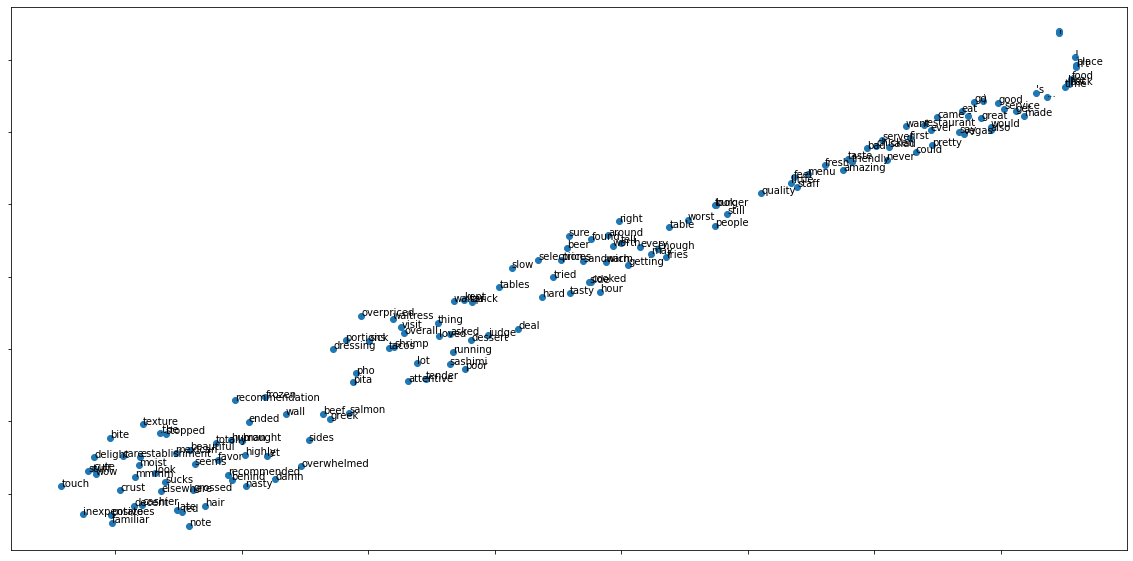

In [15]:
#Plot the t-SNE output
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
visualise= plt.show()

In [16]:
pd.isnull(model.wv.syn0).sum().sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


0

In [17]:
# Most similar words
similar = model.wv.most_similar('dinner')
similar

[('wait', 0.8893511295318604),
 (',', 0.8885118961334229),
 ('even', 0.8871994018554688),
 ("n't", 0.8865872025489807),
 ('really', 0.8865845799446106),
 ('.', 0.885930061340332),
 ('side', 0.8856327533721924),
 ('...', 0.884688675403595),
 ('back', 0.88425213098526),
 ('ever', 0.883281946182251)]

In [18]:
#Each word is converted into 100 dimensional vectors
model.vector_size

100